Stochastic Gradient Descent (SGD) is an optimization algorithm in machine learning, particularly when dealing with large datasets. It is a variant of the traditional gradient descent algorithm but offers several advantages in terms of efficiency and scalability making it the go-to method for many deep-learning tasks.

In [7]:
import numpy as np

np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

In [2]:
def sgd(X, y, learning_rate=0.1, epochs=1000, batch_size=1):
    m = len(X)
    theta = np.random.randn(2, 1)

    X_bias = np.c_[np.ones((m, 1)), X]

    cost_history = []

    for epoch in range(epochs):
        indices = np.random.permutation(m)
        X_shuffled = X_bias[indices]
        y_shuffled = y[indices]

        for i in range(0, m, batch_size):
            X_batch = X_shuffled[i:i + batch_size]
            y_batch = y_shuffled[i:i + batch_size]

            gradients = 2 / batch_size * \
                X_batch.T.dot(X_batch.dot(theta) - y_batch)
            theta -= learning_rate * gradients

        predictions = X_bias.dot(theta)
        cost = np.mean((predictions - y) ** 2)
        cost_history.append(cost)

        if epoch % 100 == 0:
            print(f"Epoch {epoch}, Cost: {cost}")

    return theta, cost_history

In [3]:
theta_final, cost_history = sgd(X, y, learning_rate=0.1, epochs=1000, batch_size=1)

Epoch 0, Cost: 1.581821686856939
Epoch 100, Cost: 1.5664692700155733
Epoch 200, Cost: 1.4445422391173144
Epoch 300, Cost: 1.7037674963102662
Epoch 400, Cost: 0.9101999515899212
Epoch 500, Cost: 0.8184497904316664
Epoch 600, Cost: 0.8352333304446237
Epoch 700, Cost: 0.8542729530055074
Epoch 800, Cost: 1.0508310318687628
Epoch 900, Cost: 0.8261971232182218


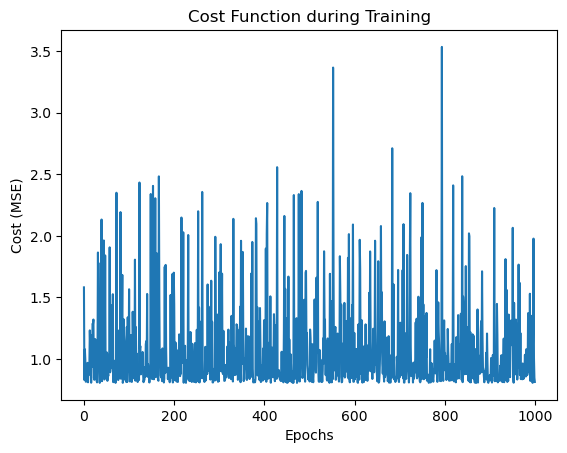

In [4]:
import matplotlib.pyplot as plt

plt.plot(cost_history)
plt.xlabel('Epochs')
plt.ylabel('Cost (MSE)')
plt.title('Cost Function during Training')
plt.show()

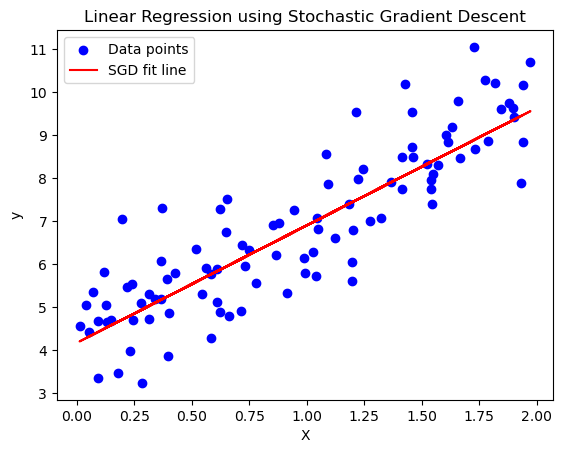

In [5]:
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X, np.c_[np.ones((X.shape[0], 1)), X].dot(
    theta_final), color='red', label='SGD fit line')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression using Stochastic Gradient Descent')
plt.legend()
plt.show()

In [6]:
print(f"Final parameters: {theta_final}")

Final parameters: [[4.17209292]
 [2.72564644]]


y=4.35+(3.45)⋅X


- Batch Gradient Descent is more accurate but slower and computationally expensive. It is ideal when working with small to medium-sized datasets and when high accuracy is required.

- Stochastic Gradient Descent, on the other hand, is faster and requires less computational power, making it suitable for large datasets. It can also escape local minima more easily but may converge less accurately.

# Momentum:
Momentum is a concept from physics where an object’s motion depends not only on the current force but also on its previous velocity. In the context of gradient optimization it refers to a method that smoothens the optimization trajectory by adding a term that helps the optimizer remember the past gradients.

# Adagrad (Adaptive Gradient Algorithm):
Adagrad (Adaptive Gradient Algorithm) is an optimization method that adjusts the learning rate for each parameter during training. Unlike standard gradient descent with a fixed rate, Adagrad uses past gradients to scale updates making it effective for sparse data and varying feature magnitudes.

# --------------------------------------------------------------------------

# RMSProp Optimizer in Deep Learning
RMSProp (Root Mean Square Propagation) is an adaptive learning rate optimization algorithm designed to improve the performance and speed of training deep learning models.

In [8]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [9]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [10]:
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

C:\Users\lenovo\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [11]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001, rho=0.9),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
history = model.fit(x_train, y_train, epochs=10,
                    batch_size=32, validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9211 - loss: 0.2674 - val_accuracy: 0.9535 - val_loss: 0.1559
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9644 - loss: 0.1187 - val_accuracy: 0.9682 - val_loss: 0.1136
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9748 - loss: 0.0835 - val_accuracy: 0.9718 - val_loss: 0.1017
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9806 - loss: 0.0662 - val_accuracy: 0.9735 - val_loss: 0.0995
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9842 - loss: 0.0537 - val_accuracy: 0.9731 - val_loss: 0.1069
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9865 - loss: 0.0442 - val_accuracy: 0.9706 - val_loss: 0.1231
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9889 - loss: 0.0373 - val_accuracy: 0.9716 - val_loss: 0.1342
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9907 - loss: 0.0317 - 

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9731 - loss: 0.1301
Test accuracy: 0.9731


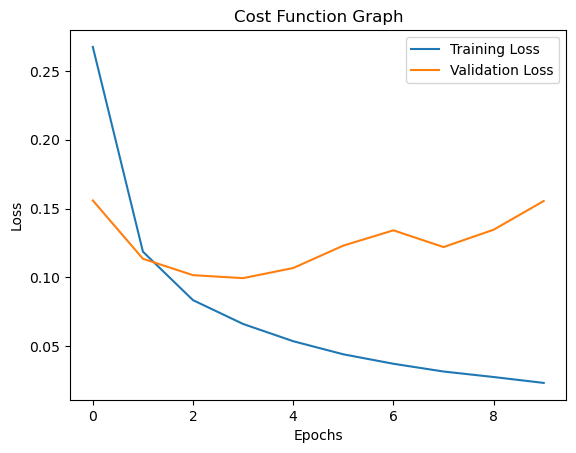

In [13]:
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test accuracy: {accuracy:.4f}')

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Cost Function Graph')
plt.legend()
plt.show()